<a href="https://colab.research.google.com/github/Elwing-Chou/tibaml0922/blob/main/mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
# tensorflow 2
# import keras(1) -> import tensorflow.keras(2)
from tensorflow.keras.datasets.mnist import load_data
# ((訓練圖片, 訓練答案), (測試圖片, 測試答案))
(x_train, y_train), (x_test, y_test) = load_data()

In [45]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [46]:
import pandas as pd
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0


5


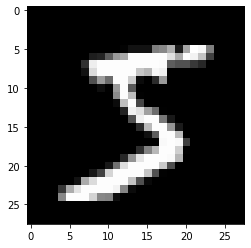

In [47]:
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
# _r: 反過來
import matplotlib.pyplot as plt
print(y_train[0])
plt.imshow(x_train[0], cmap="gray")

In [48]:
# 1. 模型(Model, Sequential) 2. 層
from tensorflow.keras.models import Sequential
# Dense: 稠密層, 全連接層(Fully-Connected)
from tensorflow.keras.layers import Dense
layers = [
    # 784 * 256 + 256(bias) = 200960
    Dense(256, activation="relu", input_dim=784),
    # 128 * 10(全連接) + 10(bias) = 1290
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [49]:
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
# loss: 分類=cross entropy
# 二元分類(一個) p(ans) q(pre) plog(1/q) + (1-p)log1/(1-q)
# binary cross entropy
# 多元分類(多個) p1 p2... q1 q2... plog(1/q)
# catergorical cross entropy
model.compile(loss=CategoricalCrossentropy(),
              optimizer=Adam(),
              metrics=["accuracy"])

In [50]:
# y: One-Hot Encoding
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
print(y_train[0])
print(y_train_cat[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [51]:
# x: 28 * 28 -> 784
# reshape: 留一個位置填-1, 叫numpy幫你算
x_train_norm = x_train.reshape(60000, -1) / 255.0
x_test_norm = x_test.reshape(10000, -1) / 255.0
print(x_train_norm.shape)
print(x_test_norm.shape)
# print(x_train_norm[0])

(60000, 784)
(10000, 784)


In [ ]:
# batch_size: 看多少筆資料調整一次梯度(10-200)
# = 200: 54000(訓練資料) / 200 -> 270(次)梯度調整
# epochs: 54000筆看幾次
# = 10: 270 * 10 (次) 梯度調整
# validation_split: 0.1
# verbose: 1(進度條) 0(啥都沒) 2(不會有進度條)
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ModelCheckpoint("mnist.h5", save_best_only=True)
]
model.fit(x_train_norm,
          y_train_cat,
          batch_size=200,
          epochs=100,
          validation_split=0.1,
          verbose=2,
          callbacks=callbacks)

In [53]:
model.evaluate(x_test_norm, y_test_cat)

313/313 [==============================] - 1s 4ms/step - loss: 0.0703 - accuracy: 0.9799


[0.07034656405448914, 0.9799000024795532]

In [57]:
from sklearn.metrics import confusion_matrix
# tf: predict -> sklearn: predict_proba
proba = model.predict(x_test_norm)
# axis: 0(縱) 1(橫)
pre = proba.argmax(axis=1)
mat = confusion_matrix(y_test, pre)
pd.DataFrame(mat,
             index=["{}(正確)".format(i) for i in range(10)],
             columns=["{}(預測)".format(i) for i in range(10)])

,0(預測),1(預測),2(預測),3(預測),4(預測),5(預測),6(預測),7(預測),8(預測),9(預測)
0(正確),971,0,3,1,0,0,2,1,2,0
1(正確),0,1122,4,1,0,1,2,2,3,0
2(正確),4,1,1012,3,2,0,2,4,4,0
3(正確),0,0,3,992,0,2,0,5,3,5
4(正確),1,0,4,1,964,0,3,2,1,6
5(正確),2,0,0,7,1,872,4,1,2,3
6(正確),3,2,1,1,5,3,942,0,1,0
7(正確),1,3,9,1,1,0,0,1005,2,6
8(正確),5,0,4,5,4,4,1,4,942,5
9(正確),2,3,0,7,12,4,0,3,1,977
